# Nosecone Designs

This notbook provides descriptions, equations and renderings of several nose cone shapes commonly used in hobbly rocketry. The notebook leverages serveral common packages such as matplotlib, numpy for data handling and 2D graphing and some less-common packages viewscad, solidpython and OpenSCAD for 3D rendering.

Our first step is to import these packages.

In [1]:
from os.path import expanduser
import matplotlib.pyplot as plt
import numpy as np
import viewscad
from solid import *

L and R define the length and radius of the nosecone and S defines the diameter of the shoulder. M is the diameter of the mount.

In [2]:
L = 31
R = 13.88/2
S = 0
M = 0

The smoothing factor defines the number of segments used to render objects

In [3]:
SMOOTH=100

This function rotates the nosecone profile around the z-axis and outputs an .stl file

In [4]:
def build_3d(points, name, shoulder=0, mount=0):
    r = viewscad.Renderer()
    p = rotate_extrude(360, segments=SMOOTH)(polygon(points))
    if shoulder != 0:
        p += translate([0, 0, -shoulder])(cylinder(r=shoulder, h=shoulder, segments=SMOOTH))
        
        if mount != 0:
            p -= translate([0, 0, -shoulder])(cylinder(r=mount, h=shoulder, segments=SMOOTH))
                                         
    r.render(p, outfile=expanduser("~") + '/' + name + '.stl')

This function adds origin coordinates to the arrays passed and plots a graph of the nosecone profile in 2 dimensions. The arrays are combined into an array of points and returned.

In [5]:
def build_2d(x, y):
    zero = np.array([0])
    xplt = np.concatenate((zero, x, zero))
    yplt = np.concatenate((zero, y, zero))

    plt.axes().set_aspect("equal")    
    plt.plot(xplt, yplt)
    
    return np.vstack((yplt, xplt)).T

We define a set of values for X from 0 to the nosecone length.

In [6]:
x = np.linspace(0, L, int(L))


## Elliptical

The elliptical nose cone shape is one-half of an ellipse, with the major axis being the centerline and the minor axis being the base of the nose cone. A rotation of a full ellipse about its major axis is called a prolate spheroid, so an elliptical nose shape would properly be known as a prolate hemispheroid. This shape is popular in subsonic flight (such as model rocketry) due to the blunt nose and tangent base and are generally considered superior for model rocketry altitude optimisation use. This is not a shape normally found in professional rocketry, which almost always flies at much higher velocities where other designs are more suitable.

The profile is defined as $y=R{\sqrt  {1-{x^{2} \over L^{2}}}}$ If $R = L$, this is a hemisphere.

We define our function, apply that to the values of x to generate an array of y values, which are used to generate a plot of the nosecone profile. The points returned combine the x and y arrays with the addition of the origin point to enure a closed shape. 

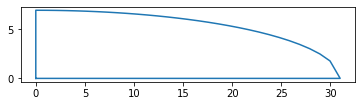

In [7]:
f = lambda x: R * np.sqrt(1-(x**2/L**2))
y = f(x)

points = build_2d(x, y)

rotate the profile around the z-axis to create a solid object and output an .stl for subsequent use.

In [8]:
build_3d(points, 'elliptical', S, M)

## Conical

A very common nose-cone shape is a simple cone. This shape is often chosen for its ease of manufacture, and is also often chosen for its drag and radar cross section characteristics. A lower drag cone would be more streamlined, with the most optimal shape being a Sears-Haack body. The sides of a conical profile are straight lines, so the diameter equation is simply $y={xR \over L}$

Cones are sometimes defined by their half angle, $\phi$

$\phi = \arctan \Bigl({R \over L}\Bigr)$ and $y = x \tan (\phi) $

In practical applications, a conical nose is often blunted by capping it with a segment of a sphere. The tangency point where the sphere meets the cone can be found from

$x_t = \frac{L^2}{R}\sqrt{\frac{r_n^2}{R^2+L^2}}$

$y_t = \frac{x_tR}{L}$

where

$r_n$ is the radius of the spherical nose cap.

$x_o = x_t + \sqrt{r_n^2 - y_t^2}$

$x_a = x_o - r_n$

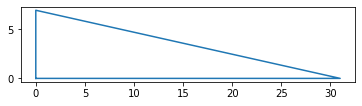

In [9]:
f = lambda x: x*R/L
y = f(x)

points = build_2d(x, y[::-1])

In [10]:
build_3d(points, 'conical', S, M)

## Parabolic
This nose shape is not the blunt shape that is envisioned when people commonly refer to a "parabolic" nose cone. The parabolic series nose shape is generated by rotating a segment of a parabola around a line parallel to its latus rectum. This construction is similar to that of the tangent ogive, except that a parabola is the defining shape rather than a circle. Just as it does on an ogive, this construction produces a nose shape with a sharp tip. For the blunt shape typically associated with a parabolic nose, see power series below. (The parabolic shape is also often confused with the elliptical shape.)

For $0 \leq K^\prime \leq 1 :  y=R \Biggl({2({x \over L})-K^\prime({x \over L})^{2} \over 2-K^\prime}\Biggr)$

$K^\prime$ can vary anywhere between $0$ and $1$, but the most common values used for nose cone shapes are:

| Parabola Type | $K^\prime$ Value |
| --- | --- |
| Cone | $0$ |
| Half | $\frac {1}{2}$ |
| Three Quarter| $3 \over 4$ |
| Full | $1$ |

For the case of the full parabola $(K^\prime = 1)$ the shape is tangent to the body at its base, and the base is on the axis of the parabola. Values of $K^\prime \lt 1$ result in a slimmer shape, whose appearance is similar to that of the secant ogive. The shape is no longer tangent at the base, and the base is parallel to, but offset from, the axis of the parabola.

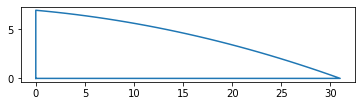

In [11]:
K = .75

f = lambda x: R*(((2*(x/L))-(K*(x/L)**2))/(2-K))
y = f(x)

points = build_2d(x, y[::-1])

In [12]:
build_3d(points, 'parabolic', S, M)

## Ogive
### Tangent ogive
Next to a simple cone, the tangent ogive shape is the most familiar in model/hobby rocketry. The profile of this shape is formed by a segment of a circle such that the rocket body is tangent to the curve of the nose cone at its base, and the base is on the radius of the circle. The popularity of this shape is largely due to the ease of constructing its profile, as it is simply a circular section.

The radius of the circle that forms the ogive is called the ''ogive radius'', $\rho$, and it is related to the length and base radius of the nose cone as expressed by the formula

$\rho = {R^2 + L^2\over 2R}$

The radius $y$ at any point $x$, as $x$ varies from $0$ to $L$ is

$y = \sqrt{\rho^2 - (L - x)^2}+R - \rho$

The nose cone length, $L$, must be $\leq \rho$. If they are equal, then the shape is a hemisphere.

### Spherically blunted tangent ogive
A tangent ogive nose is often blunted by capping it with a segment of a [[sphere]].  The tangency point where the sphere meets the tangent ogive can be found from:
\begin{align}
  x_o &= L - \sqrt{\left(\rho - r_n\right)^2 - (\rho - R)^2} \\
  y_t &= \frac{r_n(\rho - R)}{\rho - r_n} \\
  x_t &= x_o - \sqrt{r_n^2 - y_t^2}
\end{align}
where $r_n$ is the radius and $x_o$ is the center of the spherical nose cap.

Finally, the apex point can be found from:
$x_a = x_o - r_n$

3501.797692
[ 0.          1.03333333  2.06666667  3.1         4.13333333  5.16666667
  6.2         7.23333333  8.26666667  9.3        10.33333333 11.36666667
 12.4        13.43333333 14.46666667 15.5        16.53333333 17.56666667
 18.6        19.63333333 20.66666667 21.7        22.73333333 23.76666667
 24.8        25.83333333 26.86666667 27.9        28.93333333 29.96666667
 31.        ] [6.80278207 6.81177764 6.82046824 6.82885389 6.83693459 6.84471034
 6.85218115 6.859347   6.86620792 6.87276389 6.87901492 6.88496101
 6.89060217 6.89593839 6.90096967 6.90569602 6.91011744 6.91423393
 6.91804549 6.92155213 6.92475383 6.92765061 6.93024246 6.93252938
 6.93451139 6.93618846 6.93756062 6.93862785 6.93939015 6.93984754
 6.94      ]


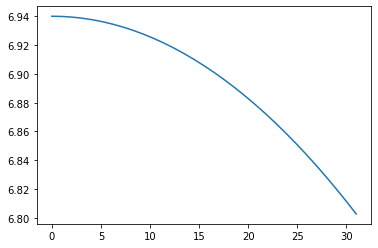

In [13]:
rho = ((R**2+L**2)/2*R)
print(rho)
f = lambda x: np.sqrt((rho**2 - (x-L)**2)) + (R - rho)
y = f(x)
print(x, y)
yplt = y[::-1]
plt.axes().set_aspect("auto")    
plt.plot(x, yplt)


## Haack series

Unlike all of the nose cone shapes above, the Haack Series shapes are not constructed from geometric figures. The shapes are instead mathematically derived for the purpose of minimizing drag; see also Sears–Haack body. While the series is a continuous set of shapes determined by the value of $C$ in the equations below, two values of $C$ have particular significance: when $C = 0$, the notation $LD$ signifies minimum drag for the given length and diameter, and when $C = {1 \over 3}$, $LV$ indicates minimum drag for a given length and volume. The Haack series nose cones are not perfectly tangent to the body at their base except for the case where $C = {2 \over 3}$. However, the discontinuity is usually so slight as to be imperceptible. For $C > {2 \over 3}$, Haack nose cones bulge to a maximum diameter greater than the base diameter. Haack nose tips do not come to a sharp point, but are slightly rounded.

$\theta = \arccos \Bigl(1 - {2X \over L}\Bigr)$

$y = {R \over \sqrt{\pi}} \sqrt{\theta-{\sin({2\theta})\over2}+C \sin^3({\theta})}$

Where:

$C = {1 \over 3}$ for LV-Haack 

$C = 0$ for LD-Haack

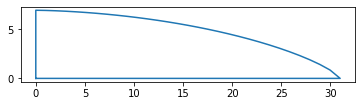

In [14]:
C = 1/3

f = lambda x: (R/np.sqrt(np.pi))*np.sqrt((np.arccos(1 - (2*x)/L)) - (np.sin(2 * (np.arccos(1 - (2*x)/L))))/2 + C * np.sin((np.arccos(1 - (2*x)/L)))**3)
y = f(x)

points = build_2d(x, y[::-1])

In [15]:
build_3d(points, 'haak', S, M)